In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score


In [ ]:
#Load Dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [ ]:
#Show first few Columns
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Check null Values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
#print types of data
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
#code for shape of data
df.shape

(214, 10)

<Axes: >

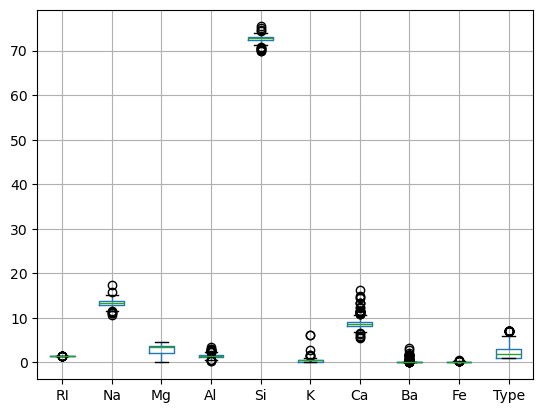

In [ ]:
#Check Outliers
df.boxplot()

In [ ]:
#select data types that have int value
num= df.select_dtypes(include=["int64"])

In [ ]:
#Remove Outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
LQR = Q3 -Q1

df_new = df[~((num < (Q1 - 1.5 * LQR)) | (num > (Q3 + 1.5 * LQR))).any(axis=1)]

In [ ]:
#after remove outliers shape of data
df_new.shape

(185, 10)

In [ ]:
#Import model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#split x and y columns
x= df[['RI', 'Na','Mg',	'Al', 'Si',	'K', 'Ca', 'Ba', 'Fe']]
y= df['Type']

In [13]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
#Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df["Type"])

In [ ]:
#split data in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
models = {"Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest" :RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging" : BaggingClassifier(estimator= DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "AdaBoost" : AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
}

In [ ]:
#Function for classification report of models
def evaluate_model(models, name, x_test,y_test):
    y_pred = models.predict(x_test)
    model_name = models.__class__.__name__
    print(f"\n===={name} ====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("classification_report:", classification_report(y_test, y_pred))
    print("f1_score:", f1_score(y_test, y_pred, average="weighted"))
    print("recall_score:", recall_score(y_test, y_pred, average="weighted"))
    print("precision_score:", precision_score(y_test, y_pred, average="weighted"))


In [ ]:
#code for save model in dictionary and give output model by model
result ={}
for name, models in models.items():
    print("Training:", name)
    models.fit(x_train ,y_train)
    evaluate_model(models, name, x_test, y_test)
    y_pred = models.predict(x_test)
    #acc = accuracy_score(y_test, y_pred)
    result[name] = accuracy_score(y_test,y_pred)

xgb=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric="logloss", random_state =42)
xgb.fit(x_train ,y_train)

y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

Training: Decision Tree

====Decision Tree ====
Accuracy: 0.7209302325581395
classification_report:               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.64      0.50      0.56        14
           2       0.60      1.00      0.75         3
           3       0.50      0.25      0.33         4
           4       1.00      0.67      0.80         3
           5       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.72      0.72      0.70        43
weighted avg       0.71      0.72      0.70        43

f1_score: 0.7012266301869586
recall_score: 0.7209302325581395
precision_score: 0.713426625054532
Training: Random Forest

====Random Forest ====
Accuracy: 0.8372093023255814
classification_report:               precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.90      0.64      0.75        

c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



====Gradient Boosting ====
Accuracy: 0.8604651162790697
classification_report:               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.92      0.79      0.85        14
           2       0.75      1.00      0.86         3
           3       1.00      0.75      0.86         4
           4       1.00      0.33      0.50         3
           5       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43

f1_score: 0.8501294328106912
recall_score: 0.8604651162790697
precision_score: 0.8799372462163159
0.8372093023255814


In [ ]:
#store model name and accuracy for plot graph
result_df = pd.DataFrame(list(result.items()), columns=["models", "accuracy"])

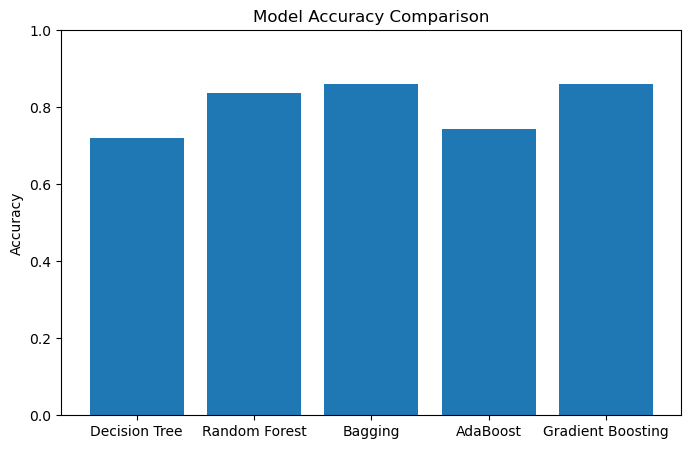

In [ ]:
#Graph for comaprison of accuracy model
plt.figure(figsize=(8,5))
plt.bar(result_df["models"], result_df["accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

Conclusion-
    Hence its proved Gradient Boosting and Bagging have more accuracy than others.